Model Train

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Step 1: Load the dataset
data = pd.read_csv('/content/weather_data_engineered_daily_data.csv')

# Step 2: Select relevant columns (features and multiple targets)
features = [
    'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_min', 'rain_sum',
    'showers_sum', 'daylight_duration', 'precipitation_sum', 'temperature_range',
    'diurnal_temp_range', 'precipitation_intensity'
]
targets = ['apparent_temperature_max', 'sunshine_duration', 'snowfall_sum',
           'precipitation_sum', 'precipitation_hours']

# Step 3: Handle missing values
data.ffill(inplace=True)

# Step 4: Normalize the features
scaler_features = StandardScaler()
data[features] = scaler_features.fit_transform(data[features])

# Initialize results dictionary
results = {}

# Step 5: Iterate through each target variable
for target in targets:
    # Normalize the target variable
    scaler_target = StandardScaler()
    data[target] = scaler_target.fit_transform(data[[target]])

    # Split the data into features (X) and target (y)
    X = data[features].values
    y = data[target].values

    # Train/Validation/Test Split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Convert the data into DMatrix
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Define model parameters
    params = {
        "objective": "reg:squarederror",
        "learning_rate": 0.01,
        "max_depth": 6,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "seed": 42
    }

    # Train the model with early stopping
    evals = [(dtrain, 'train'), (dval, 'validation')]
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=1000,
        evals=evals,
        early_stopping_rounds=50,
        verbose_eval=False
    )

    # Evaluate the model on validation and test sets
    y_val_pred = model.predict(dval)
    y_test_pred = model.predict(dtest)

    val_rmse = root_mean_squared_error(y_val, y_val_pred)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store metrics and model
    results[target] = {
        "Validation RMSE": val_rmse,
        "Test RMSE": test_rmse,
        "Test R2 Score": test_r2,
        "Model": model
    }

# Step 6: Display the results
results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics for All Targets:")
print(results_df[['Validation RMSE', 'Test RMSE', 'Test R2 Score']])

#Save the Model


Model Performance Metrics for All Targets:
                         Validation RMSE Test RMSE Test R2 Score
apparent_temperature_max        0.078587  0.076828       0.99423
sunshine_duration               0.156066  0.175517      0.968332
snowfall_sum                    0.233588  0.236291      0.943074
precipitation_sum                0.02185  0.019003      0.999653
precipitation_hours             0.080209  0.080498      0.993547


Model Validation:


Validating model for target: apparent_temperature_max
Validation Set (apparent_temperature_max) Metrics: RMSE: 0.0176, MAE: 0.0113, R²: 0.9937
Test Set (apparent_temperature_max) Metrics: RMSE: 0.0177, MAE: 0.0112, R²: 0.9935


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


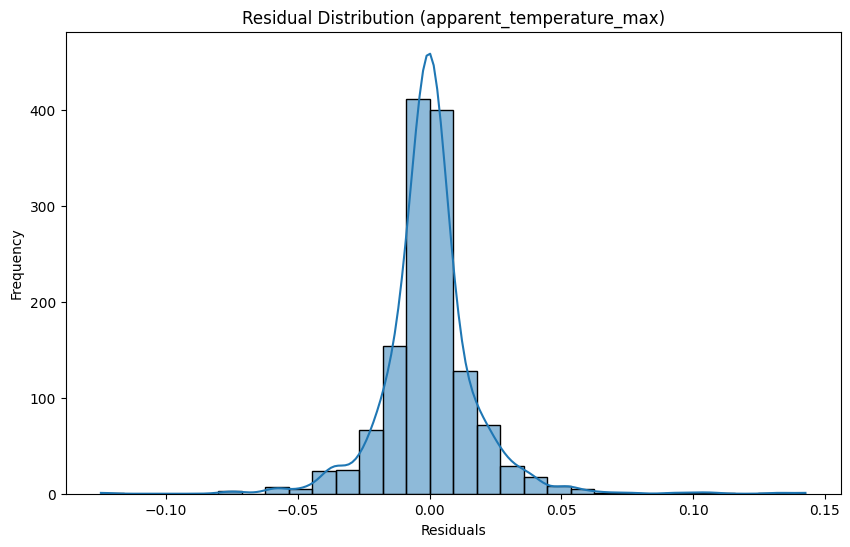

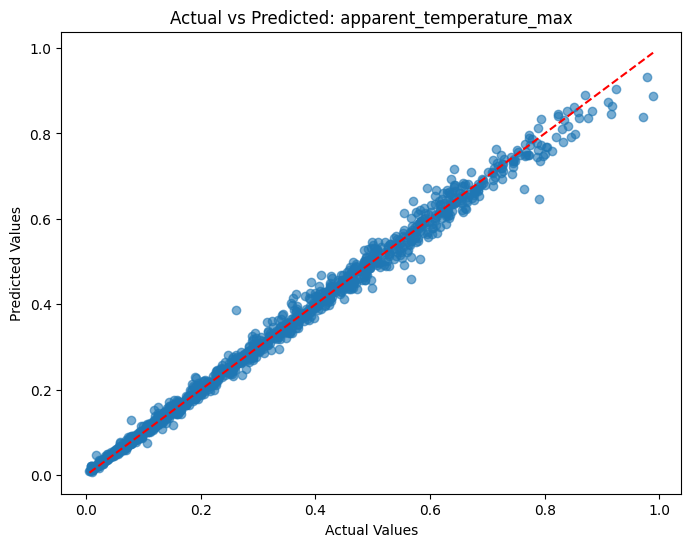


Validating model for target: sunshine_duration
Validation Set (sunshine_duration) Metrics: RMSE: 0.0176, MAE: 0.0113, R²: 0.9937
Test Set (sunshine_duration) Metrics: RMSE: 0.0177, MAE: 0.0112, R²: 0.9935


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


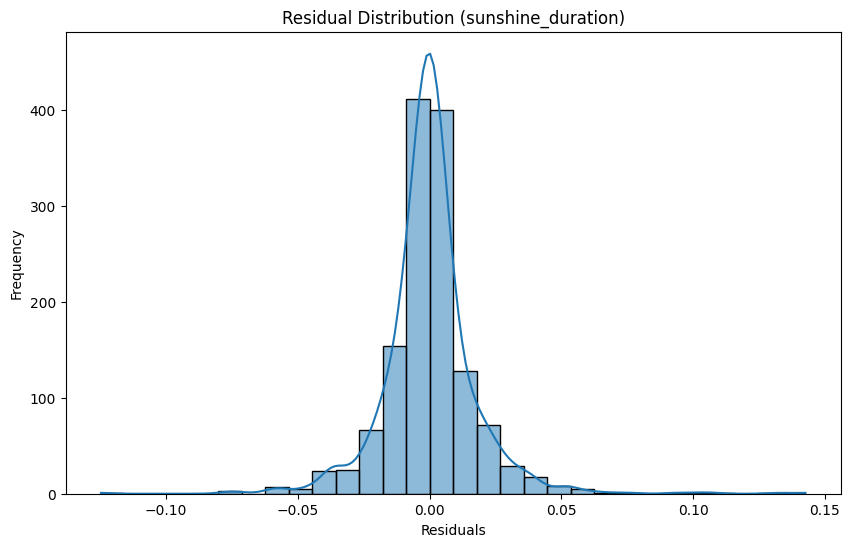

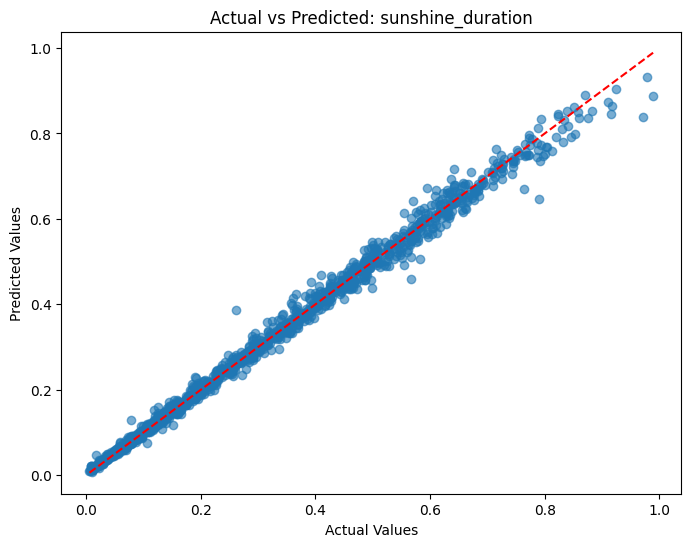


Validating model for target: snowfall_sum
Validation Set (snowfall_sum) Metrics: RMSE: 0.0176, MAE: 0.0113, R²: 0.9937
Test Set (snowfall_sum) Metrics: RMSE: 0.0177, MAE: 0.0112, R²: 0.9935


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


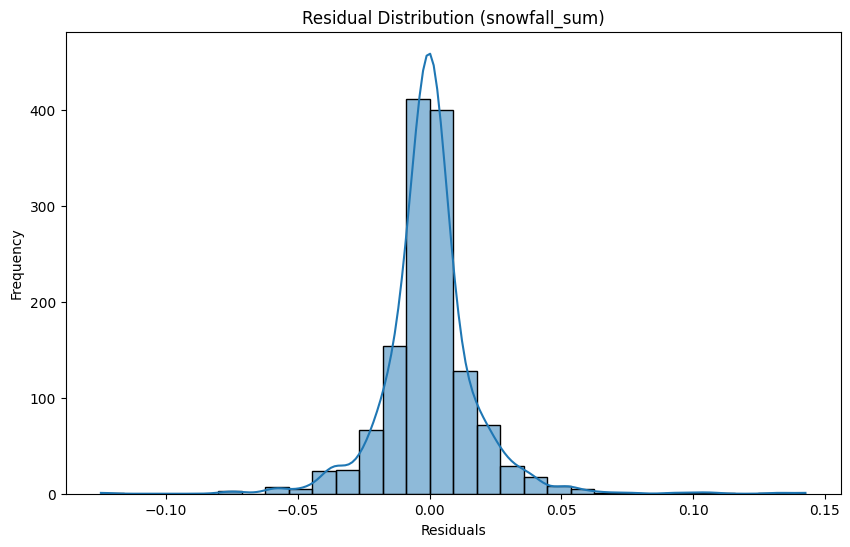

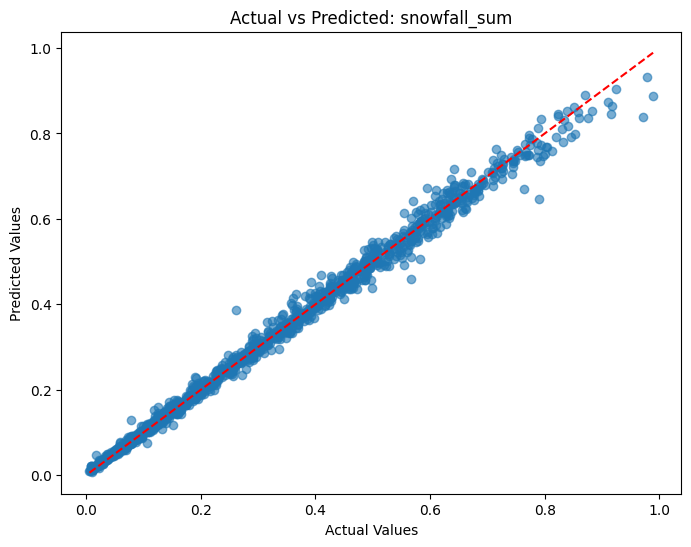


Validating model for target: precipitation_sum
Validation Set (precipitation_sum) Metrics: RMSE: 0.0176, MAE: 0.0113, R²: 0.9937
Test Set (precipitation_sum) Metrics: RMSE: 0.0177, MAE: 0.0112, R²: 0.9935


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


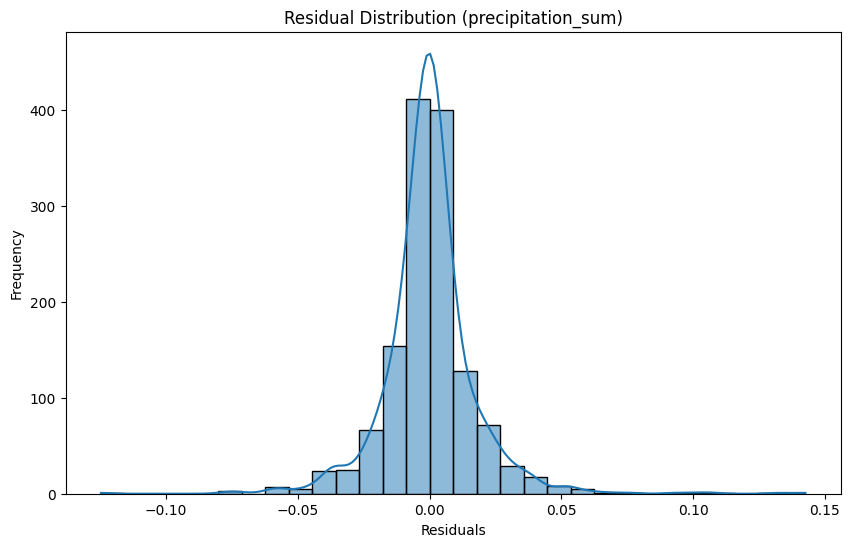

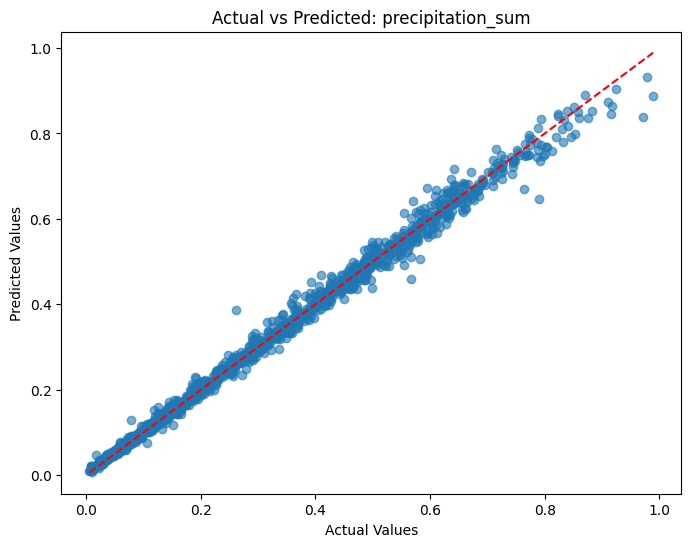


Validating model for target: precipitation_hours
Validation Set (precipitation_hours) Metrics: RMSE: 0.0176, MAE: 0.0113, R²: 0.9937
Test Set (precipitation_hours) Metrics: RMSE: 0.0177, MAE: 0.0112, R²: 0.9935


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


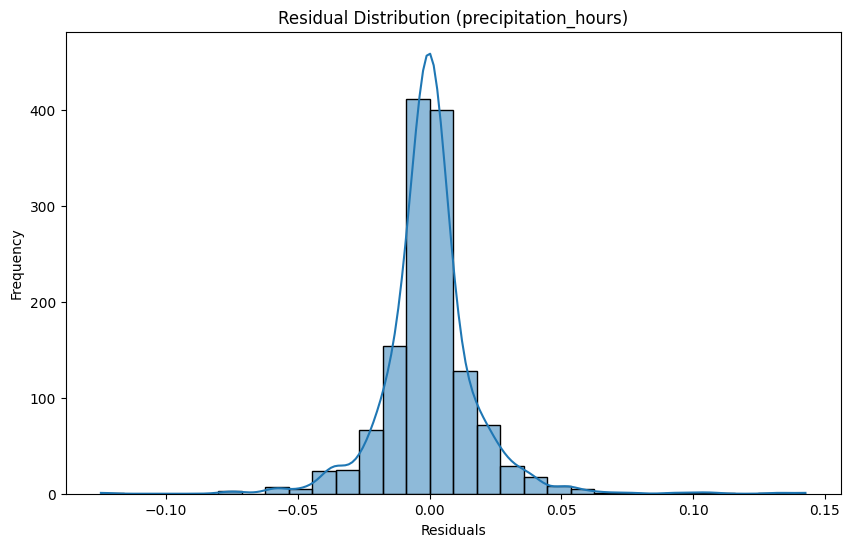

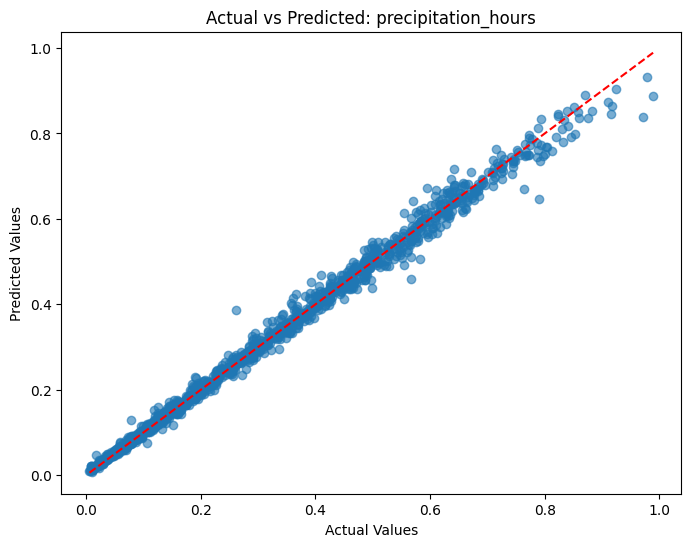

In [ ]:
#Model validation:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Step 1: Validate each target variable
for target in targets:
    print(f"\nValidating model for target: {target}")

    # Make predictions
    y_val_pred = model.predict(xgb.DMatrix(X_val))
    y_test_pred = model.predict(xgb.DMatrix(X_test))

    # Inverse transform the test and validation predictions
    y_val_actual = scaler_target.inverse_transform(y_val.reshape(-1, 1)).flatten()
    y_val_pred_actual = scaler_target.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_test_pred_actual = scaler_target.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()

    # Metrics
    def evaluate_model(y_true, y_pred, label="Set"):
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        print(f"{label} Metrics: RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

    evaluate_model(y_val_actual, y_val_pred_actual, label=f"Validation Set ({target})")
    evaluate_model(y_test_actual, y_test_pred_actual, label=f"Test Set ({target})")

    # Residual plots
    residuals = y_test_actual - y_test_pred_actual
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f"Residual Distribution ({target})")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

    # Actual vs Predicted plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_actual, y_test_pred_actual, alpha=0.6)
    plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
    plt.title(f"Actual vs Predicted: {target}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()

    # Feature Importance plot
    #xgb.plot_importance(model)
    #plt.title(f"Feature Importance for {target}")
    #plt.show()

Model Bias Detection:

In [ ]:
import pandas as pd
import numpy as np
import json
from sklearn.metrics import mean_squared_error

# Define RMSE calculation
def calculate_rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

# Perform slicing and calculate metrics for each slice
def calculate_metrics_for_slices(data, slice_column, models, features, scalers):
    metrics = {}

    # Generate predictions for each slice
    unique_values = data[slice_column].unique()
    for target, model in models.items():
        scaler_target = scalers[target]
        for value in unique_values:
            slice_data = data[data[slice_column] == value]
            if slice_data.empty:
                print(f"Warning: No data points for slice '{value}' in target '{target}'")
                continue

            X_slice = slice_data[features].values
            y_slice = slice_data[target].values

            # Convert X_slice to DMatrix and make predictions
            dmatrix_slice = xgb.DMatrix(X_slice)
            y_slice_pred = model.predict(dmatrix_slice)

            # Inverse transform the predictions and actual values
            y_slice_actual = scaler_target.inverse_transform(y_slice.reshape(-1, 1)).flatten()
            y_slice_pred_actual = scaler_target.inverse_transform(y_slice_pred.reshape(-1, 1)).flatten()

            # Calculate RMSE
            rmse = calculate_rmse(y_slice_actual, y_slice_pred_actual)
            metrics[f"{target}_{slice_column}_{value}"] = rmse

    return metrics

# Add a binning column to the test data
def bin_column(data, column_name, bins=4, labels=None):
    if labels is None:
        labels = [f"bin_{i}" for i in range(1, bins+1)]
    return pd.qcut(data[column_name], q=bins, labels=labels)

# Collect scalers and models from the training process
scalers = {}  # This should contain target-specific scalers from the training phase
for target in targets:
    scalers[target] = StandardScaler().fit(data[[target]])  # Fit on normalized targets

# Prepare test data with slicing
test_data = pd.DataFrame(X_test, columns=features)
for target in targets:
    test_data[target] = y_test if target in scalers else np.nan  # Assign target values where applicable
test_data['temperature_bin'] = bin_column(test_data, 'temperature_2m_max', bins=4, labels=['low', 'medium', 'high', 'very_high'])

# Calculate metrics for slices
slice_column = 'temperature_bin'
bias_metrics = calculate_metrics_for_slices(test_data, slice_column, models=results_df['Model'].to_dict(), features=features, scalers=scalers)

# Save and display metrics
print("\nBias Metrics Across Slices:")
for slice_name, rmse in bias_metrics.items():
    print(f"{slice_name}: RMSE = {rmse:.4f}")

# Convert metrics to JSON format and save
bias_metrics = {key: float(value) for key, value in bias_metrics.items()}
with open("bias_metrics.json", "w") as f:
    json.dump(bias_metrics, f)

# Bias detection
average_rmse = np.mean(list(bias_metrics.values()))
bias_threshold = 0.1 * average_rmse  # 10% of the average RMSE

print("\nPotential Bias Detection:")
for slice_name, rmse in bias_metrics.items():
    if abs(rmse - average_rmse) > bias_threshold:
        print(f"Potential bias in {slice_name}: RMSE = {rmse:.4f} (Avg RMSE = {average_rmse:.4f})")

# Analyze the distribution of bins in the training data
train_data = pd.DataFrame(X_train, columns=features)
train_data['temperature_bin'] = bin_column(train_data, 'temperature_2m_max', bins=4, labels=['low', 'medium', 'high', 'very_high'])
print("\nDistribution of temperature bins in training data:")
print(train_data['temperature_bin'].value_counts())

# Correlation analysis for bins in training data
for bin_name in ['low', 'medium', 'high', 'very_high']:
    subset = train_data[train_data['temperature_bin'] == bin_name]
    subset = subset.drop(columns=['temperature_bin'])
    print(f"\nFeature Correlations in {bin_name} bin:")
    print(subset.corr())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo


Bias Metrics Across Slices:
apparent_temperature_max_temperature_bin_very_high: RMSE = 0.7262
apparent_temperature_max_temperature_bin_low: RMSE = 0.6030
apparent_temperature_max_temperature_bin_high: RMSE = 0.8330
apparent_temperature_max_temperature_bin_medium: RMSE = 0.6205
sunshine_duration_temperature_bin_very_high: RMSE = 1.9265
sunshine_duration_temperature_bin_low: RMSE = 1.1101
sunshine_duration_temperature_bin_high: RMSE = 1.6306
sunshine_duration_temperature_bin_medium: RMSE = 1.5955
snowfall_sum_temperature_bin_very_high: RMSE = 0.6676
snowfall_sum_temperature_bin_low: RMSE = 0.3899
snowfall_sum_temperature_bin_high: RMSE = 0.8366
snowfall_sum_temperature_bin_medium: RMSE = 0.5853
precipitation_sum_temperature_bin_very_high: RMSE = 0.2432
precipitation_sum_temperature_bin_low: RMSE = 0.1451
precipitation_sum_temperature_bin_high: RMSE = 0.1324
precipitation_sum_temperature_bin_medium: RMSE = 0.1321
precipitation_hours_temperature_bin_very_high: RMSE = 0.9737
precipitation_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SHAP Feature Importance for Each Target

Training model for target: apparent_temperature_max


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Computing SHAP values for target: apparent_temperature_max
Generating SHAP summary plot for apparent_temperature_max


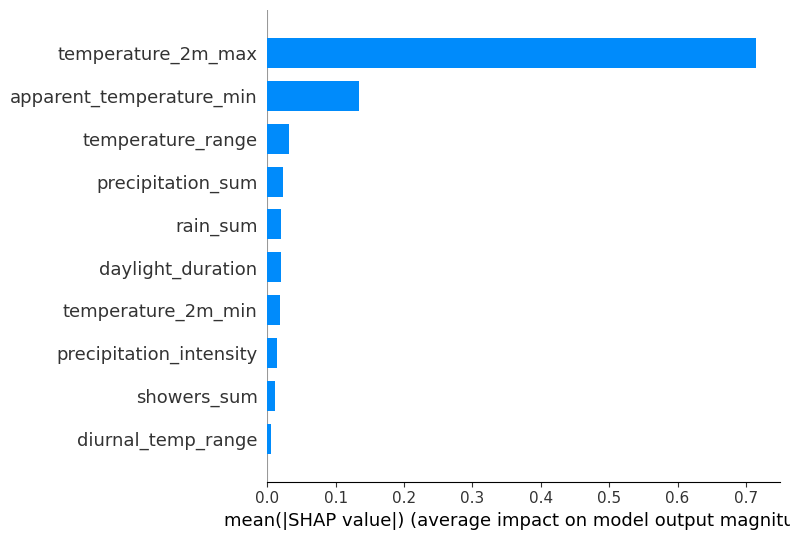

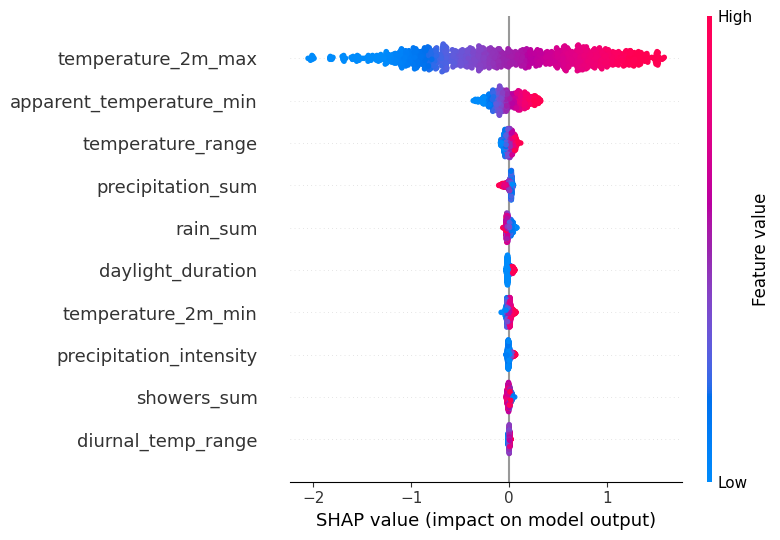

Training model for target: sunshine_duration


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Computing SHAP values for target: sunshine_duration
Generating SHAP summary plot for sunshine_duration


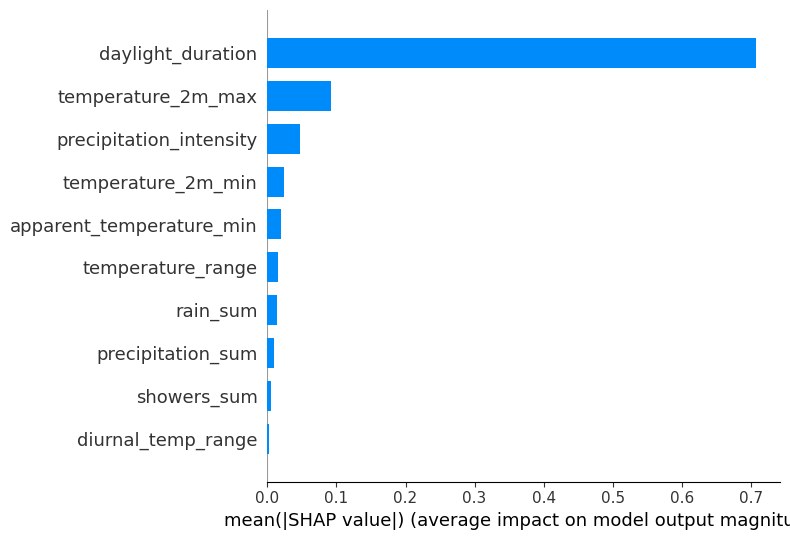

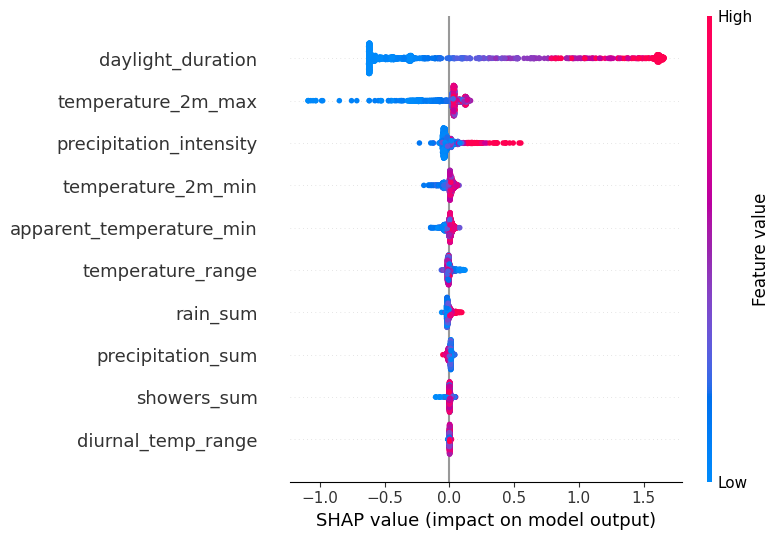

Training model for target: snowfall_sum


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Computing SHAP values for target: snowfall_sum
Generating SHAP summary plot for snowfall_sum


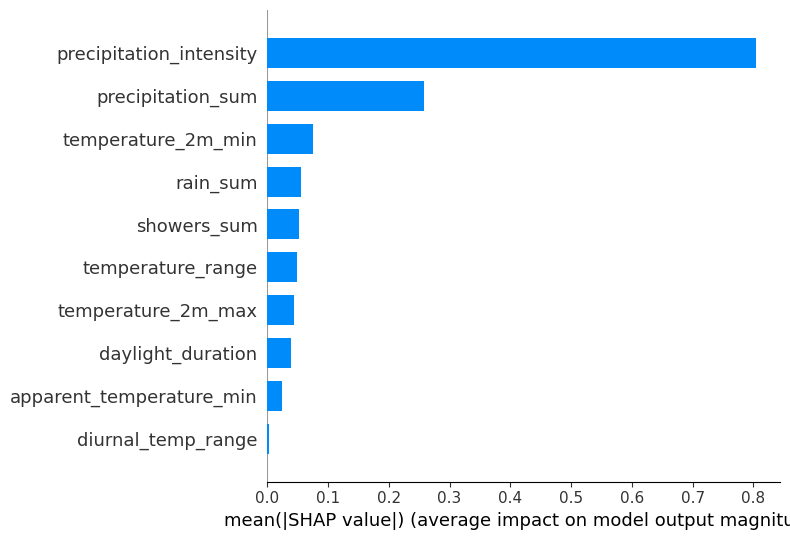

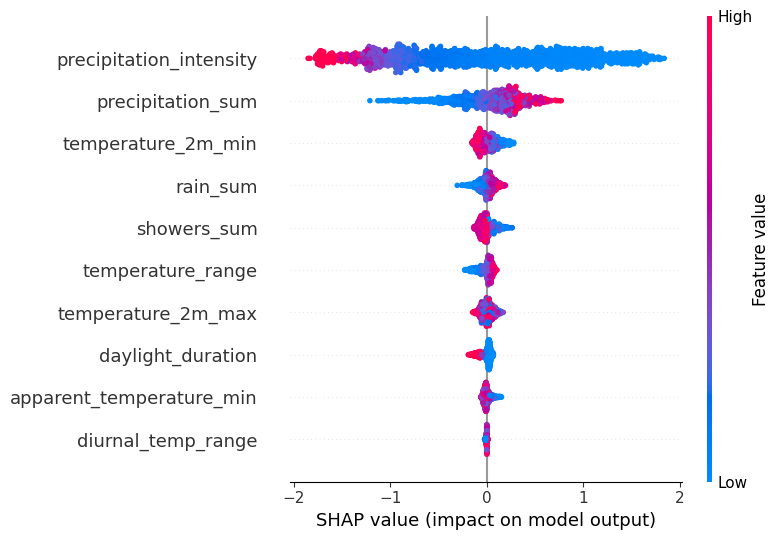

Training model for target: precipitation_sum


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Computing SHAP values for target: precipitation_sum
Generating SHAP summary plot for precipitation_sum


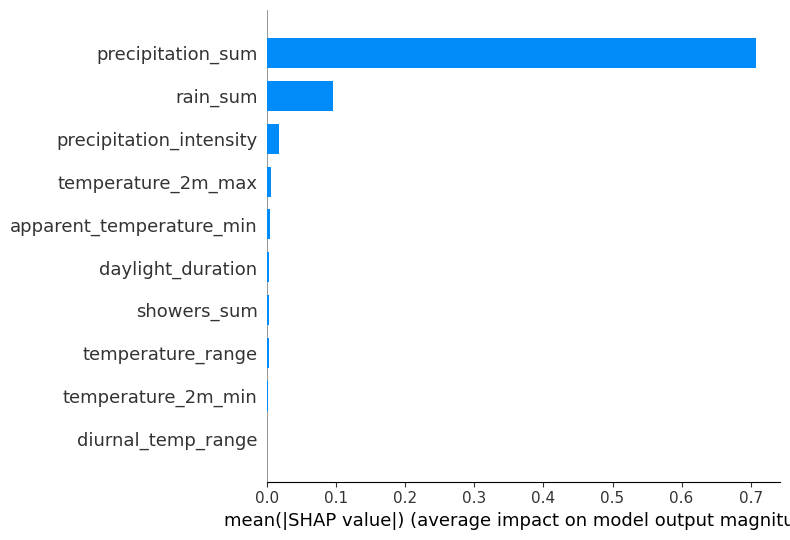

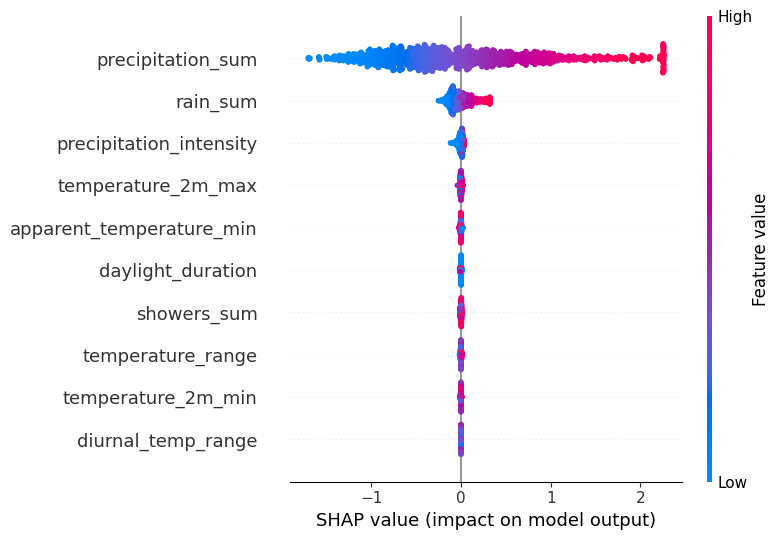

Training model for target: precipitation_hours


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Computing SHAP values for target: precipitation_hours
Generating SHAP summary plot for precipitation_hours


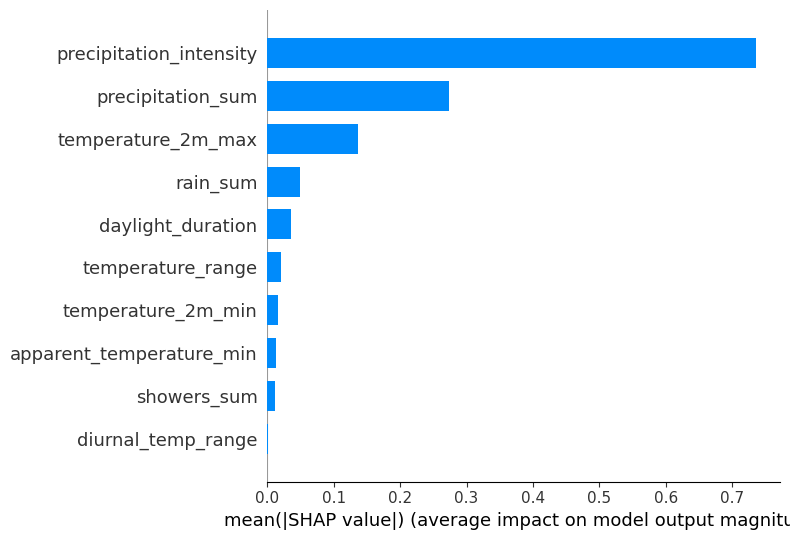

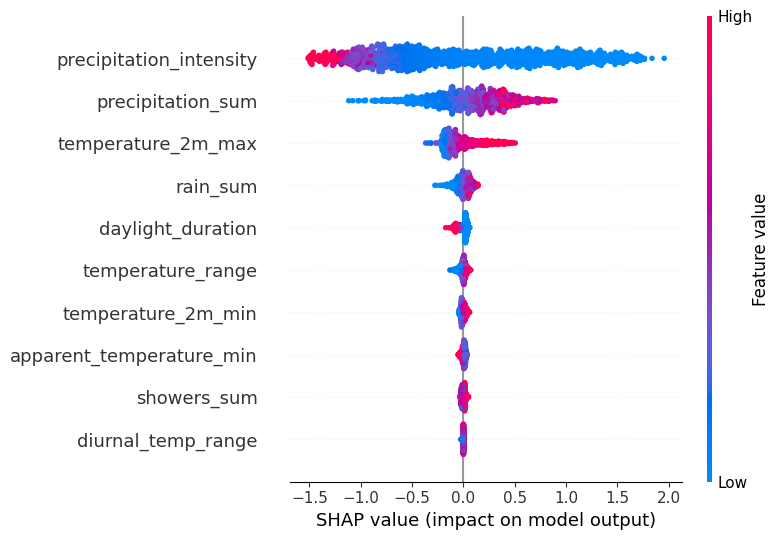


Model Performance Metrics for All Targets:
                         Validation RMSE Test RMSE Test R2 Score
apparent_temperature_max        0.078587  0.076828       0.99423
sunshine_duration               0.156066  0.175517      0.968332
snowfall_sum                    0.233588  0.236291      0.943074
precipitation_sum                0.02185  0.019003      0.999653
precipitation_hours             0.080209  0.080498      0.993547


In [ ]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
data = pd.read_csv('/content/weather_data_engineered_daily_data.csv')

# Step 2: Select relevant columns (features and multiple targets)
features = [
    'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_min', 'rain_sum',
    'showers_sum', 'daylight_duration', 'precipitation_sum', 'temperature_range',
    'diurnal_temp_range', 'precipitation_intensity'
]
targets = ['apparent_temperature_max', 'sunshine_duration', 'snowfall_sum',
           'precipitation_sum', 'precipitation_hours']

# Step 3: Handle missing values
data.ffill(inplace=True)

# Step 4: Normalize the features
scaler_features = StandardScaler()
data[features] = scaler_features.fit_transform(data[features])

# Initialize results dictionary
results = {}

# Step 5: Iterate through each target variable
for target in targets:
    print(f"Training model for target: {target}")

    # Normalize the target variable
    scaler_target = StandardScaler()
    data[target] = scaler_target.fit_transform(data[[target]])

    # Split the data into features (X) and target (y)
    X = data[features].values
    y = data[target].values

    # Train/Validation/Test Split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Convert the data into DMatrix
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Define model parameters
    params = {
        "objective": "reg:squarederror",
        "learning_rate": 0.01,
        "max_depth": 6,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "seed": 42
    }

    # Train the model with early stopping
    evals = [(dtrain, 'train'), (dval, 'validation')]
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=1000,
        evals=evals,
        early_stopping_rounds=50,
        verbose_eval=False
    )

    # Evaluate the model on validation and test sets
    y_val_pred = model.predict(dval)
    y_test_pred = model.predict(dtest)

    val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store metrics and model
    results[target] = {
        "Validation RMSE": val_rmse,
        "Test RMSE": test_rmse,
        "Test R2 Score": test_r2,
        "Model": model,
        "Scaler": scaler_target,
        "X_test": X_test,
    }

    # SHAP Feature Importance
    print(f"Computing SHAP values for target: {target}")
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    # SHAP Summary Plot
    print(f"Generating SHAP summary plot for {target}")
    shap.summary_plot(shap_values, X_test, feature_names=features, plot_type="bar")
    shap.summary_plot(shap_values, X_test, feature_names=features)

# Step 6: Display the results
results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics for All Targets:")
print(results_df[['Validation RMSE', 'Test RMSE', 'Test R2 Score']])